# Part II - Prosper Load Data Exploration
## by Zukhriddin Juliev

## Investigation Overview
Main goal of the investigation is to find factors impacting investor number per loan. Following key insights have been made:
- Investor numbers is highly skewed to lower numbers. However, there are also many loans with investors more than 20. 
- Loan size is the key factor in defining investor numbers. Larger loans are correlated with greater investor numbers.
- There is highly negative correlation between interest rates (borrower rate or exected returns) and investor number. These might be explained via size of the loans. Larger loans have lower rates.
- Homeowners are more likely to secure large loans with more investors.
- Loans category of debt consolidation or business are more likely to be funded by multiple investors. This fact can also be explained by loans size for such category and also type of security.

## Dataset Overview

This is ProsperDataset, which contains 113,937 observations of loans with 81 variables along several years. The dataset have information on loans such as profitablity, borrower background, loand conditions, investor number and credit history of borrower and others. This investigation uses data from year 2013 with 15 variables. Final sample consist of 33912 unique loans. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.style.use('seaborn') ## I use this plot style for most of the plots. But I also use other plot style later.

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Loading the data and leaving observations with loans only for year 2013
df = pd.read_csv("prosperLoanData.csv")
# Converting loan origination date to timestamp and choosing loans for year 2013
df['LoanOriginationDate'] = pd.to_datetime(df["LoanOriginationDate"]).dt.normalize()
year = df['LoanOriginationDate'].dt.year
df = df[year == 2013]
# Removing duplicates
df = df.drop_duplicates(subset = 'LoanNumber')
### Converting homeownership into string Yes and No
df['IsBorrowerHomeowner'] = df['IsBorrowerHomeowner'].replace({True:'Yes', False: 'No'})
### Creating text type categories
category = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement',
            3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other',
            8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
            11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 
            14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 
            17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
# Creating a column with text values
df['ListingCategory (text)'] = df['ListingCategory (numeric)'].replace(category) 

### Subsetting the dataset with the variables used for the final visualisation
variables = ['Investors', 'BorrowerRate', 'LoanOriginalAmount',
             'IsBorrowerHomeowner', 'ListingCategory (text)']
df = df[variables].reset_index()

## Distribution of investor numbers

Investor numbers per loan are highly skewed. 25% of loans have 1 investor only. The second most common loans have investor numbers between 20 to 40. There are also many loans with investor number greater than 100. Below is the distribution in raw and log transformed values for loans with investors greater than 5.  


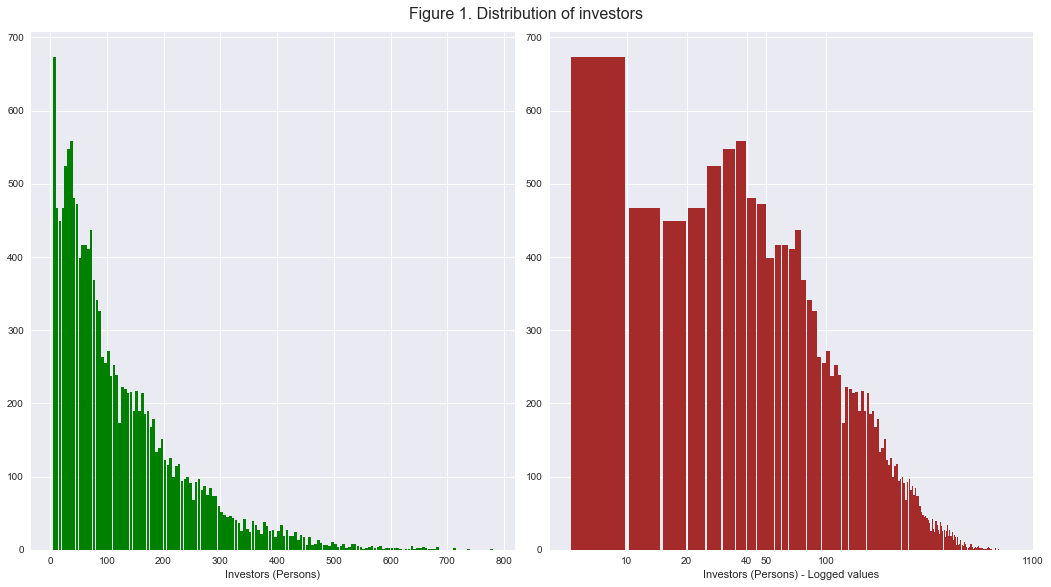

In [3]:
binsize = 5
bins = np.arange(5, df['Investors'].max() + binsize, binsize)

fig, axes = plt.subplots(1, 2, figsize =[14.7,8.27])
fig.suptitle('Figure 1. Distribution of investors', fontsize = 16)

axes[0].hist(data = df, x = 'Investors', bins = bins, color = 'green', rwidth = 0.90)
axes[0].set_xlabel('Investors (Persons)')

axes[1].hist(data = df, x = 'Investors', bins = bins, color = 'brown', rwidth = 0.90)
axes[1].set_xscale('log')
axes[1].set_xticks([10, 20, 40, 50, 100, 1100], [10, '20', '40', '50', '100', '1100'])
axes[1].set_xlabel('Investors (Persons) - Logged values')

fig.tight_layout()
plt.show()

## Loan size, Borrower rate, home owneship - Investor numbers
Loan size is the key factor for a investor numbers. It explains why there is negative correlation between borrowing rate and investor numbers. Larger loans are also more likely to be borrowed by homeowners which can be a sign for secure loan payment. Below scatterplot shows this relationship. Homeowners have more larger sized loans and consequently more loans with multiple investors.

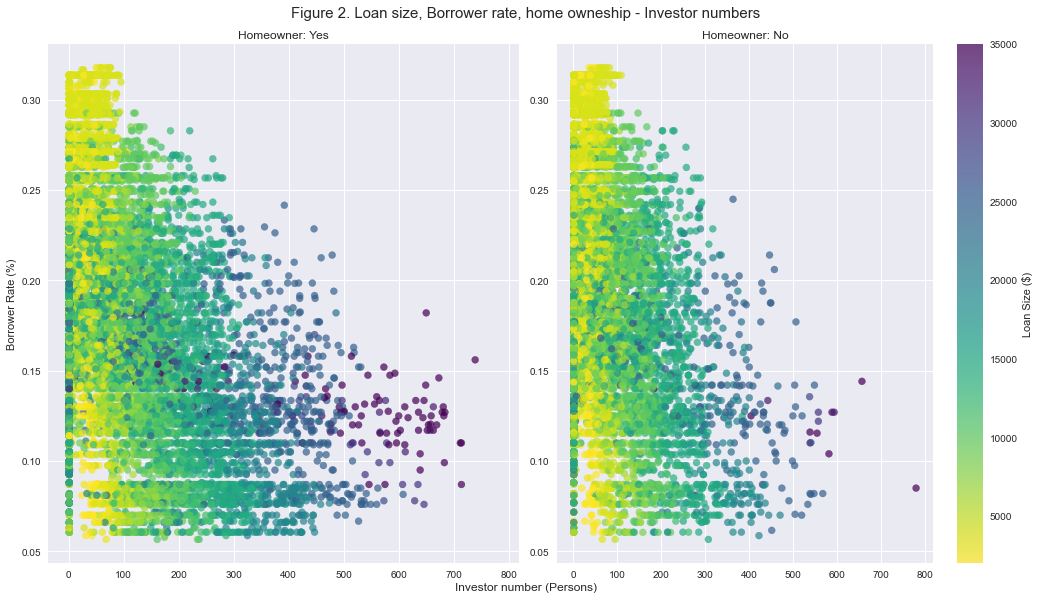

In [4]:
x = 'Investors'
y = 'BorrowerRate'
c = 'LoanOriginalAmount'
z = 'IsBorrowerHomeowner'
## Creating subsets of data by homeownership
df_y = df[df.IsBorrowerHomeowner == 'Yes']
df_n = df[df.IsBorrowerHomeowner == 'No']
## Plotting side by side with a colorbar
fig, axes = plt.subplots(1, 2, figsize =[14.7,8.27], sharex=True)
fig.suptitle('Figure 2. Loan size, Borrower rate, home owneship - Investor numbers', fontsize = 15)
left = axes[0].scatter(data = df_y, x=x, y=y, c = c, cmap = 'viridis_r', alpha  = 0.7)
right = axes[1].scatter(data = df_n, x=x, y=y, c = c, cmap = 'viridis_r', alpha  = 0.7)
fig.colorbar(right, label = 'Loan Size ($)')
axes[0].set_title('Homeowner: Yes')
axes[1].set_title('Homeowner: No')
axes[0].set_ylabel('Borrower Rate (%)')
fig.text(0.5, 0.0, 'Investor number (Persons)', ha='center', fontsize = 12)
fig.tight_layout()
plt.show()

## Loan size, investor number and most frequent loan category
Correlation between investor number and loan size is clear. Among most frequent loans, loans under debt consolidation and business are the ones which attract bigger loans and consequently more investors.

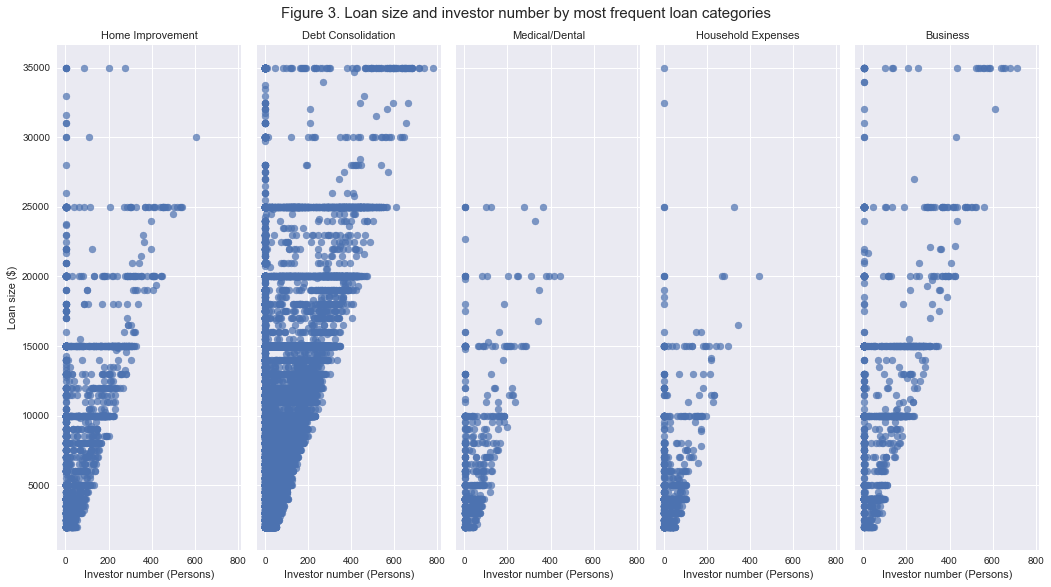

In [5]:
x = 'Investors'
y = 'LoanOriginalAmount'

most_freq_category = ['Debt Consolidation', 'Home Improvement', 'Business', 'Household Expenses', 'Medical/Dental']
data = df[df['ListingCategory (text)'].isin(most_freq_category)] ## Subsetting dataset


g = sb.FacetGrid(data = data, col = 'ListingCategory (text)')
g.map(plt.scatter, x, y, alpha = 0.7)
g.figure.set_size_inches(14.7,8.27)

g.set_axis_labels("Investor number (Persons)", "Loan size ($)")
g.set_titles(col_template="{col_name}")

g.fig.suptitle('Figure 3. Loan size and investor number by most frequent loan categories', fontsize = 15)

g.tight_layout()

plt.show()

In [6]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 1151556 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "D:\Conda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "D:\Moved_from_C\Python\Python39\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "D:\Conda\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "D:\Conda\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "D:\Conda\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "D:\Conda\lib\site-packages\nbconvert\nbconvertapp.py", line 508, in conver